### 플랜
1. vibrational state 고려하여 반응식 만들기 XS 데이터 활용하여 Reaction Rate계산 (Maxwellian or bi-Maxwellian?)
2. Sheath 전압에 새로운 식 사용해 보기 (현재는 C-L, collisionless)
3. Gas in-out 고려
4. Surface reaction 공부할만한 자료가 있을지..

### 수정해야할 것
1. ne나 H2+같은게 너무 빨리 올라간다는 느낌이 있다. 이것을 확인해 봐야할듯
2. Te가 빨리 떨어진다. Vs랑 연관있는듯 보인다.. (Power balance eqn)

In [2]:
#### import library ####
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from math import isclose
import xs
import graph

In [1]:
#### Experimental Setup ####
np.seterr(all='ignore')
path = 'C:/Users/GUNU/Dropbox/SNUPI/Python_Projects/Global_Model/Model_result'

kB = 1.38e-23 #[J/K] [m2 kg K-1 s-2] Boltzmann constant
e = 1.6e-19 #[C] electronic charge
M = 1.67e-27 #[kg] mass of H atom
m = 9.1e-31 #[kg] mass of electorn
ro = 5 #[cm] radius of chamber
l = 100 #[cm] chamber length
Tg = 300 #[K] room temperature
V = np.pi*ro**2*l #[cm^3] discharge volume
A = 2*np.pi*ro*l+2*np.pi*ro**2 #[cm^2] loss area
v0 = 100*(8*Tg*kB/(M*np.pi))**0.5 #[cm/s] mean velocity of H atom
sigma_i = 5e-15 #[cm2]
g = 0.1 #Recombination Factor
LAMBDAeff = ((2.405/ro)**2+(np.pi/l)**2)**-0.5 #[cm]
D_Kn = v0 * LAMBDAeff/3 #[cm2/s]
Deff = D_Kn
T1 = LAMBDAeff**2/Deff #[s]

In [12]:
class Global_model():
    #Initialization
    def __init__(self, p, input_power, duty, period, time_resolution = 1e-8):
        self.p = p
        self.input_power = input_power
        self.duty = duty
        self.period = period
        self.time_resolution = time_resolution
        
        self.ng = (self.p/7.5)/(Tg*kB)*1e-6 #[cm^-3]
        lambda_i = 1/(self.ng*sigma_i) #[cm] ion-neutral mean free path
        hl = 0.86*(3+l/2/lambda_i)**-0.5
        hR = 0.8*(4+ro/lambda_i)**-0.5

        self.Aeff = 2*np.pi*ro*(l*hR+ro*hl)  #[cm^2] effective area
        self.deff = V/self.Aeff #[cm]
        print('Condition : {}mTorr, {}W, {}ms, {}'.format(self.p, self.input_power/6.241509e18, self.period*1000, self.duty))
        
    #Balance equation calculate function
    def balance_equations(self, calculation_array, t, power):
        Te, nH, nH_2s, nH2_v1, nH2_v2, nH2_v3, nH2_v4, nH2_v5, nH2_v6, nH2_v7, nH2_v8, nH2_v9, nHp, nH2p, nH3p, nHm = calculation_array
        
        uB = np.sqrt(e*Te/M)*100 #[cm/s]
        uB2 = np.sqrt(e*Te/2/M)*100
        uB3 = np.sqrt(e*Te/3/M)*100
        #Vs = -Te*np.log(4/ne/np.sqrt(8*e*Te/np.pi/m)*(nHp*uB+nH2p*uB2+nH3p*uB3))
        Vs = Te*np.log(np.sqrt(M/(2*np.pi*m)))
        t0 = V/self.Aeff*np.sqrt(M/(e*Te))/100 #[s] Characteristic transit time of H+ ion 
        #k8,k9,k11의 Te가 매우 작을때의 Cross section값을 구해야한다. (k2는 괜찮음)
            
        ##### Rate coefficient calculation #####
        k1_0 = xs.rate_constant_with_analytic_xs(Te, 'reaction1_0')
        k1_1 = xs.rate_constant_with_analytic_xs(Te, 'reaction1_1')
        k1_2 = xs.rate_constant_with_analytic_xs(Te, 'reaction1_2')
        k1_3 = xs.rate_constant_with_analytic_xs(Te, 'reaction1_3')
        k1_4 = xs.rate_constant_with_analytic_xs(Te, 'reaction1_4')
        k2 = np.exp(-2.858072836568e+01+1.038543976082e+01*np.log(Te)-5.383825026583e+00*(np.log(Te))**2+1.950636494405e+00*(np.log(Te))**3-5.393666392407e-01*(np.log(Te))**4+1.006916814453e-01*(np.log(Te))**5-1.160758573972e-02*(np.log(Te))**6+7.411623859122e-04*(np.log(Te))**7-2.001369618807e-05*(np.log(Te))**8)
        k3_1 = xs.rate_constant_with_point_xs(Te, 'reaction3_1')
        k3_2 = xs.rate_constant_with_point_xs(Te, 'reaction3_2')
        k3_3 = xs.rate_constant_with_point_xs(Te, 'reaction3_3')
        k3_4 = xs.rate_constant_with_point_xs(Te, 'reaction3_4')
        k3_5 = xs.rate_constant_with_point_xs(Te, 'reaction3_5')
        k3_6 = xs.rate_constant_with_point_xs(Te, 'reaction3_6')
        k3_1_inv = 
        k3_2_inv = 
        k3_3_inv = 
        k3_4_inv = 
        k3_5_inv = 
        k3_6_inv = 
        k4_0 = 
        k4_1 = 
        k4_2 = 
        k4_3 = 
        k4_4 = 
        k4_5 = 
        k4_6 = 
        k4_7 = 
        k4_8 = 
        k4_0_inv = 
        k4_1_inv = 
        k4_2_inv = 
        k4_3_inv = 
        k4_4_inv = 
        k4_5_inv = 
        k4_6_inv = 
        k4_7_inv = 
        k4_8_inv = 
        k5_0 = xs.rate_constant_with_analytic_xs(Te, 'reaction5_0')
        k5_1 = xs.rate_constant_with_analytic_xs(Te, 'reaction5_1')
        k5_2 = xs.rate_constant_with_analytic_xs(Te, 'reaction5_2')
        k5_3 = xs.rate_constant_with_analytic_xs(Te, 'reaction5_3')
        k5_4 = xs.rate_constant_with_analytic_xs(Te, 'reaction5_4')
        k5_5 = xs.rate_constant_with_analytic_xs(Te, 'reaction5_5')
        k5_6 = xs.rate_constant_with_analytic_xs(Te, 'reaction5_6')
        k5_7 = xs.rate_constant_with_analytic_xs(Te, 'reaction5_7')
        k5_8 = xs.rate_constant_with_analytic_xs(Te, 'reaction5_8')
        k5_9 = xs.rate_constant_with_analytic_xs(Te, 'reaction5_9')
        k6_0 = xs.rate_constant_with_point_xs(Te, 'reaction6_0')
        k6_1 = xs.rate_constant_with_point_xs(Te, 'reaction6_1')
        k6_2 = xs.rate_constant_with_point_xs(Te, 'reaction6_2')
        k6_3 = xs.rate_constant_with_point_xs(Te, 'reaction6_2') #xs 데이터 보완 必
        k6_4 = xs.rate_constant_with_point_xs(Te, 'reaction6_5') #xs 데이터 보완 必
        k6_5 = xs.rate_constant_with_point_xs(Te, 'reaction6_5')
        k6_6 = xs.rate_constant_with_point_xs(Te, 'reaction6_6')
        k6_7 = xs.rate_constant_with_point_xs(Te, 'reaction6_7')
        k6_8 = xs.rate_constant_with_point_xs(Te, 'reaction6_8')
        k6_9 = xs.rate_constant_with_point_xs(Te, 'reaction6_9')
        k7 = np.exp(-3.834597006782e+01+1.426322356722e+01*np.log(Te)-5.826468569506e+00*(np.log(Te))**2+1.727940947913e+00*(np.log(Te))**3-3.598120866343e-01*(np.log(Te))**4+4.822199350494e-02*(np.log(Te))**5-3.909402993006e-03*(np.log(Te))**6+1.738776657690e-04*(np.log(Te))**7-3.252844486351e-06*(np.log(Te))**8)
        k8 = np.exp(-3.271396786375e+01+1.353655609057e+01*np.log(Te)-5.739328757388e+00*(np.log(Te))**2+1.563154982022e+00*(np.log(Te))**3-2.877056004391e-01*(np.log(Te))**4+3.482559773737e-02*(np.log(Te))**5-2.631976175590e-03*(np.log(Te))**6+1.119543953861e-04*(np.log(Te))**7-2.039149852002e-06*(np.log(Te))**8)
        k9 = np.exp(-1.781416067709e+01+2.277799785711e+00*np.log(Te)-1.266868411626e+00*(np.log(Te))**2+4.296170447419e-01*(np.log(Te))**3-9.609908013189e-02*(np.log(Te))**4+1.387958040699e-02*(np.log(Te))**5-1.231349039470e-03*(np.log(Te))**6+6.042383126281e-05*(np.log(Te))**7-1.247521040900e-06*(np.log(Te))**8)
        k10 = 2.1e-9
        k11 = np.exp(-1.700270758355e+01-4.050073042947e-01*np.log(Te)+1.018733477232e-08*(np.log(Te))**2-1.695586285687e-08*(np.log(Te))**3+1.564311217508e-10*(np.log(Te))**4+1.979725412288e-09*(np.log(Te))**5-4.395545994733e-10*(np.log(Te))**6+3.584926377078e-11*(np.log(Te))**7-1.024189019465e-12*(np.log(Te))**8)
        k12 = np.exp(-3.078408636631e+01+1.509421488513e+01*np.log(Te)-7.349167207324e+00*(np.log(Te))**2+2.320966107642e+00*(np.log(Te))**3-4.818077551719e-01*(np.log(Te))**4+6.389229162737e-02*(np.log(Te))**5-5.161880953089e-03*(np.log(Te))**6+2.303985092606e-04*(np.log(Te))**7-4.344846146197e-06*(np.log(Te))**8)
        k13 = xs.rate_constant_with_point_xs(Te, 'reaction13')
        k14 = np.exp(-1.801849334273e+01+2.360852208681e+00*np.log(Te)-2.827443061704e-01*(np.log(Te))**2+1.623316639567e-02*(np.log(Te))**3-3.365012031363e-02*(np.log(Te))**4+1.178329782711e-02*(np.log(Te))**5-1.656194699504e-03*(np.log(Te))**6+1.068275202678e-04*(np.log(Te))**7-2.631285809207e-06*(np.log(Te))**8)
        k15 = 1.7e-9
        k16 = 
        k17 = 4.4e-16 # at ion 0.02eV
        k18 = 
        k19 = np.exp(-3.454175591367e+01+1.412655911280e+01*np.log(Te)-6.004466156761e+00*(np.log(Te))**2+1.589476697488e+00*(np.log(Te))**3-2.775796909649e-01*(np.log(Te))**4+3.152736888124e-02*(np.log(Te))**5-2.229578042005e-03*(np.log(Te))**6+8.890114963166e-05*(np.log(Te))**7-1.523912962346e-06*(np.log(Te))**8)
        k20 = np.exp(-2.833259375256e+01+9.587356325603e+00*np.log(Te)-4.833579851041e+00*(np.log(Te))**2+1.415863373520e+00*(np.log(Te))**3-2.537887918825e-01*(np.log(Te))**4+2.800713977946e-02*(np.log(Te))**5-1.871408172571e-03*(np.log(Te))**6+6.986668318407e-05*(np.log(Te))**7-1.123758504195e-06*(np.log(Te))**8)
        k21 = np.exp(-1.973476726029e+01+3.992702671457e+00*np.log(Te)-1.773436308973e+00*(np.log(Te))**2+5.331949621358e-01*(np.log(Te))**3-1.181042453190e-01*(np.log(Te))**4+1.763136575032e-02*(np.log(Te))**5-1.616005335321e-03*(np.log(Te))**6+8.093908992682e-05*(np.log(Te))**7-1.686664454913e-06*(np.log(Te))**8)
        k22_1_0 = 0.42e-13 #non-reactive assumption
        k22_2_0 = 0.59e-12
        k22_2_1 = 0.30e-12
        k22_3_0 = 0.15e-11
        k22_3_1 = 0.16e-11
        k22_3_2 = 0.20e-11
        k22_4_0 = 0.43e-11
        k22_4_1 = 0.42e-11
        k22_4_2 = 0.49e-11
        k22_4_3 = 0.55e-11
        k22_5_0 = 0.16e-11
        k22_5_1 = 0.37e-11
        k22_5_2 = 0.69e-11
        k22_5_3 = 0.74e-11
        k22_5_4 = 0.89e-11
        k22_6_0 = 0.33e-11
        k22_6_1 = 0.51e-11
        k22_6_2 = 0.53e-11
        k22_6_3 = 0.69e-11
        k22_6_4 = 0.11e-10
        k22_6_5 = 0.12e-10
        k22_7_0 = 0.24e-11
        k22_7_1 = 0.38e-11
        k22_7_2 = 0.68e-11
        k22_7_3 = 0.57e-11
        k22_7_4 = 0.70e-11
        k22_7_5 = 0.11e-10
        k22_7_6 = 0.12e-10
        k22_8_0 = 0.30e-11
        k22_8_1 = 0.29e-11
        k22_8_2 = 0.29e-11
        k22_8_3 = 0.35e-11
        k22_8_4 = 0.56e-11
        k22_8_5 = 0.82e-11
        k22_8_6 = 0.12e-10
        k22_8_7 = 0.14e-10
        k22_9_0 = 0.52e-12
        k22_9_1 = 0.14e-11
        k22_9_2 = 0.30e-11
        k22_9_3 = 0.37e-11
        k22_9_4 = 0.48e-11
        k22_9_5 = 0.53e-11
        k22_9_6 = 0.92e-11
        k22_9_7 = 0.13e-10
        k22_9_8 = 0.14e-10
        k23 = 
        k24 = 
        k25 = 
        k26 = 
        k27 = 
        k28_1_0 = 1
        k28_2_0 = 0.6535
        k28_2_1 = 0.35
        k28_3_0 = 0.30023
        k28_3_1 = 0.40221
        k28_3_2 = 0.30023
        k28_4_0 = 0.17949
        k28_4_1 = 0.25373
        k28_4_2 = 0.32389
        k28_4_3 = 0.24312
        k28_5_0 = 0.15093
        k28_5_1 = 0.17867
        k28_5_2 = 0.22844
        k28_5_3 = 0.23986
        k28_5_4 = 0.19662
        k28_6_0 = 0.12483
        k28_6_1 = 0.13462
        k28_6_2 = 0.16399
        k28_6_3 = 0.1958
        k28_6_4 = 0.20478
        k28_6_5 = 0.17541
        k28_7_0 = 0.10035
        k28_7_1 = 0.11096
        k28_7_2 = 0.13054
        k28_7_3 = 0.15991
        k28_7_4 = 0.17949
        k28_7_5 = 0.17051
        k28_7_6 = 0.15093
        k28_8_0 = 0.08648
        k28_8_1 = 0.09056
        k28_8_2 = 0.10688
        k28_8_3 = 0.12483
        k28_8_4 = 0.16888
        k28_8_5 = 0.15991
        k28_8_6 = 0.14033
        k28_8_7 = 0.12564
        k28_9_0 = 0.07506
        k28_9_1 = 0.07832
        k28_9_2 = 0.08974
        k28_9_3 = 0.11014
        k28_9_4 = 0.13951
        k28_9_5 = 0.14359
        k28_9_6 = 0.12483
        k28_9_7 = 0.12238
        k28_9_8 = 0.11503
        
        ##### Energy Loss per Reaction #####
        E1_0 = 15.42
        E1_1 = 15.42
        E1_2 = 15.42
        E1_3 = 15.42
        E1_4 = 15.42
        E2 = 8.5
        E3_1 = 
        E3_2 = 
        E3_3 = 
        E3_4 = 
        E3_5 = 
        E3_6 = 
        E4_0 = 
        E4_1 =
        E4_2 =
        E4_3 =
        E4_4 =
        E4_5 =
        E4_6 =
        E4_7 =
        E4_8 =
        E5_0 = Te
        E5_1 = Te
        E5_2 = Te
        E5_3 = Te
        E5_4 = Te
        E5_5 = Te
        E5_6 = Te
        E5_7 = Te
        E5_8 = Te
        E5_9 = Te
        E6_0 = 20 # XS데이터가 다 20부터 시작임
        E6_1 = 20
        E6_2 = 20
        E6_3 = 20
        E6_4 = 20
        E6_5 = 20
        E6_6 = 20
        E6_7 = 20
        E6_8 = 20
        E6_9 = 20
        E7 = 18
        E8 = 13.6
        E9 = 10.5
        E10 = 0
        E11 = Te
        E12 = 14
        E13 = Te
        E14 = 0.75
        E15 = 0
        E16 = 0
        E17 = 0
        E18 = 0
        E19 = 15.3 
        E20 = 10.2
        E21 = 3.4
        E22 = 0
        
        #Quasi-Neutrality eqn 완료
        ne = nHp + nH2p + nH3p - nHm 

        #Hydrogen atom conservation eqn 완료
        nH2_v0 = self.ng - (0.5*(nH + nHp + nH_2s + nHm) + sum(calculation_array[3:12]) + nH2p + 1.5*nH3p)

        #Particle balance eqn for electron 완료
        dne_dt = (k1_0*ne*nH2_v0) + (k1_1*ne*nH2_v1) + (k1_2*ne*nH2_v2) + (k1_3*ne*nH2_v3) + (k1_4*ne*nH2_v4) \ 
        - (k5_0*ne*nH2_v0) - (k5_1*ne*nH2_v1) - (k5_2*ne*nH2_v2) - (k5_3*ne*nH2_v3) - (k5_4*ne*nH2_v4) - (k5_5*ne*nH2_v5) - (k5_6*ne*nH2_v6) - (k5_7*ne*nH2_v7) - (k5_8*ne*nH2_v8) - (k5_9*ne*nH2_v9) \
        + (k7*ne*nH2_v0) + (k8*ne*nH) - (k11*ne*nH3p) - (k13*ne*nH3p) + (k14*ne*nHm) + (k15*nH*nHm) + (k21ne*nH_2s) - ne*uB*self.Aeff/V
        
        #Power balance eqn for electron 아직임
        dTe_dt = 2/(3*ne)*(self.power(t)/V - (Vs+2.5*Te)*ne*uB*self.Aeff/V - 3/2*Te*dne_dt \
        - (k1*nH*E1*ne + k2*nHp*E2*ne + k3*nH2_v0*E3*ne + k4*nH2_v0*E4*ne + k5*nH2_v0*E5*ne + k6*nH2p*E6*ne + k7*nH2p*E7*ne \
        + k8*nH2p*E8*ne + k9*nH3p*E9*ne + k10*nH3p*E10*ne + k11*nH2p*E11*nH2_v0))
        
        #Particle balance eqn for other species except electron 아직임
        dnH_dt = 2*(k2*ne*nH2_v0) + (k5_0*ne*nH2_v0) + (k5_1*ne*nH2_v1) + (k5_2*ne*nH2_v2) + (k5_3*ne*nH2_v3) + (k5_4*ne*nH2_v4) + (k5_5*ne*nH2_v5) + (k5_6*ne*nH2_v6) + (k5_7*ne*nH2_v7) \
        + (k5_8*ne*nH2_v8) + (k5_9*ne*nH2_v9) + (k7*ne*nH2_v0) - (k8*ne*nH) + (k9*ne*nH2p) + (k10*nH2p*nH2_v0) + (k11*ne*nH3p) + 2*(k12*ne*nH3p) + (k14*ne*nHm) - (k15*nH*nHm) \
        + (k16*nHp*nHm) + (k17*nH2p*nHm) + 2*(k18*nH3p*nHm) + (k19*ne*nH2_v0) - (k20*ne*nH) +k23 + k24 + k26 + k27
        
        dnH_2s_dt = (k16*nHp*nHm) + (k19*ne*nH2_v0) + (k20*ne*nH) - (k21*ne*nH_2s) - k27
         
        dnH2_v1_dt = 
        
        dnH2_v2_dt = 
        
        dnH2_v3_dt = 
        
        dnH2_v4_dt = 
        
        dnH2_v5_dt = 
        
        dnH2_v6_dt = 
        
        dnH2_v7_dt = 
        
        dnH2_v8_dt = 
        
        dnH2_v9_dt = 
        
        dnHp_dt = (k7*ne*nH2_v0) + (k8*ne*nH) + (k9*ne*nH2p) + (k12*ne*nH3p) - (k16*nHp*nHm) + (k21*ne*nH_2s) - k24
        
        dnH2p_dt = (k1_0*ne*nH2_v0) + (k1_1*ne*nH2_v1) + (k1_2*ne*nH2_v2) + (k1_3*ne*nH2_v3) + (k1_4*ne*nH2_v4) - (k9*ne*nH2p) - (k10*nH2p*nH2_v0) + (k13*ne*nH3p) - (k17*nH2p*nHm) - k25
        
        dnH3p_dt = (k10*nH2p*nH2_v0) - (k12*ne*nH3p) - (k13*ne*nH3p) - (k18*nH3p*nHm) - k26
        
        dnHm_dt = (k5_1*ne*nH2_v1) + (k5_2*ne*nH2_v2) + (k5_3*ne*nH2_v3) + (k5_4*ne*nH2_v4) + (k5_5*ne*nH2_v5) + (k5_6*ne*nH2_v6) + (k5_7*ne*nH2_v7) \
        + (k5_8*ne*nH2_v8) + (k5_9*ne*nH2_v9) + (k13*ne*nH3p) - (k14*ne*nHm) - (k15*nH*nHm) - (k16*nHp*nHm) - (k17*nH2p*nHm) - (k18*nH3p*nHm)
        
        return [dTe_dt, dnH_dt, dnH_2s_dt, dnH2_v1_dt, dnH2_v2_dt, dnH2_v3_dt, dnH2_v4_dt, dnH2_v5_dt, dnH2_v6_dt, dnH2_v7_dt, dnH2_v8_dt, dnH2_v9_dt, dnHp_dt, dnH2p_dt, dnH3p_dt, dnHm_dt]
        
    #Pulsed power generate function
    def pulse_power(self,t):
        if t <= self.duty*self.period:
            return self.input_power
        else:
            return 0
    
    #Temperature & Density Calculation
    def routine(self,init_value):
        routine_time_interval = np.linspace(0, self.period, int(self.period/self.time_resolution))
        routine_result = odeint(self.balance_equations, init_value, routine_time_interval, args=(self.pulse_power,), rtol=10**-3, mxstep=10**6)
        #routine_result = np.transpose(routine_result)
        return routine_result
    
    def calculation(self):
        init_value = [2, 1e10, 1e10, 1e10, 1e10, 1e10, 1e10, 1e10, 1e10, 1e10, 1e10, 1e10, 1e10, 1e10, 1e10, 1e10]
        routine_result = self.routine(init_value)
        count = 0
        Hm_compare = 1
        while True:
            init_value = routine_result[-1]
            if not isclose(routine_result[:,15][-1], Hm_compare, rel_tol=1e-2):
                if iteration_number > 100:
                    print('did not converge')
                    break
                Hm_compare = routine_result[:,15][-1]
                routine_result = self.routine(init_value)
                count += 1
                continue
            print('---------calculation complete!---------')
            print('iteration count : {}'.format(count))
            print('---------------------------------------')
            routine_result = np.transpose(routine_result)
            Te, nH, nH_2s, nH2_v1, nH2_v2, nH2_v3, nH2_v4, nH2_v5, nH2_v6, nH2_v7, nH2_v8, nH2_v9, nHp, nH2p, nH3p, nHm = routine_result
            ne = nHp + nH2p + nH3p - nHm 
            nH2_v0 = self.ng - (0.5*(nH + nHp + nH_2s + nHm) + sum(routine_result[3:12]) + nH2p + 1.5*nH3p)
            return Te, ne, nH, nH_2s, nH2_v0, nH2_v1, nH2_v2, nH2_v3, nH2_v4, nH2_v5, nH2_v6, nH2_v7, nH2_v8, nH2_v9, nHp, nH2p, nH3p, nHm
            break


In [3]:
#### Control Variables ####
p = 5 #[mTorr] Pressure
input_power = 2000*6.241509e18 #[eV/s] Input Power
duty = 0.5
period = 1e-4
time_resolution = 1e-7

input_list = np.arange(500,4250,250)*6.241509e18
#p_list = np.array([5,7,10,15,20])
p_list = np.arange(1.5,20.5,0.5)
duty_list = np.linspace(0.1,1,100)
period_list = np.array([1e-3,2e-3,4e-3,5e-3,7e-3,8e-3,9e-3,10e-3])

Condition : 5mTorr, 500.0W, 0.1ms, 0.5


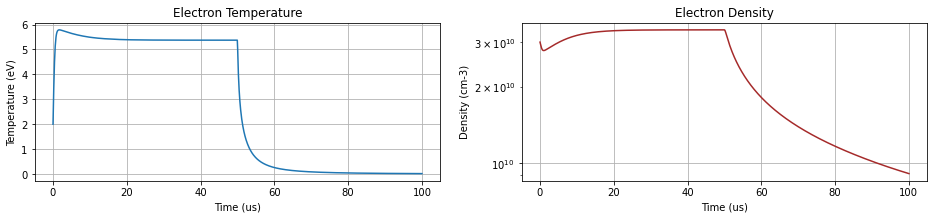

iteration count :9
---------------------------------------


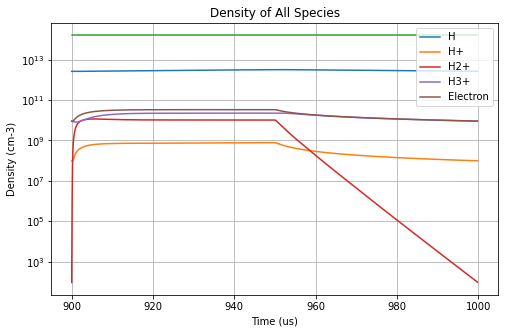

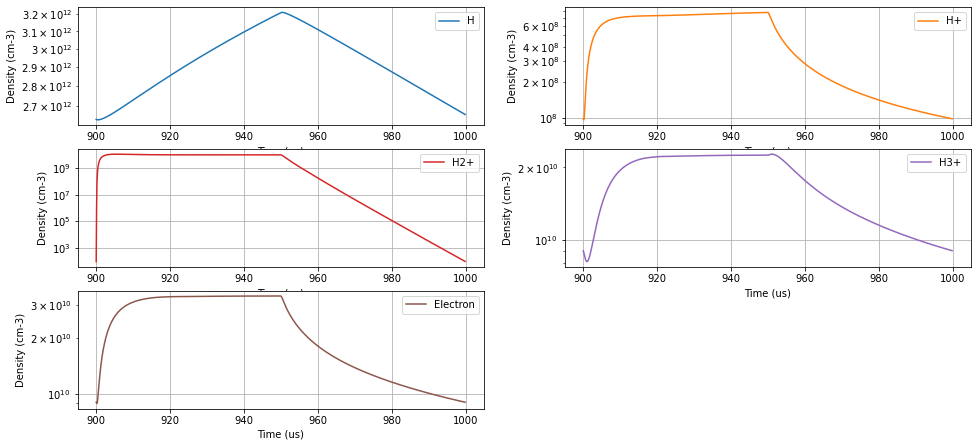

In [13]:
#### Test Calculation ####
model1 = Global_model(p, input_power, duty, period, time_resolution)
try:
    data = model1.calculation()
    
except BaseException:
    pass

Condition : 5mTorr, 500.0W, 0.1ms, 0.5


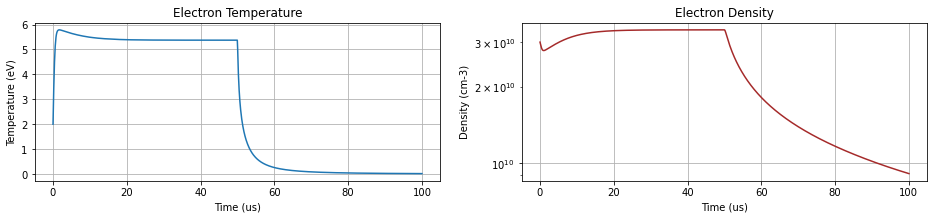

Condition : 5mTorr, 1000.0W, 0.1ms, 0.5


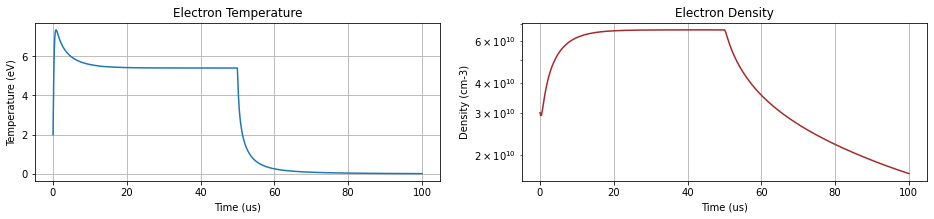

Condition : 5mTorr, 1500.0W, 0.1ms, 0.5


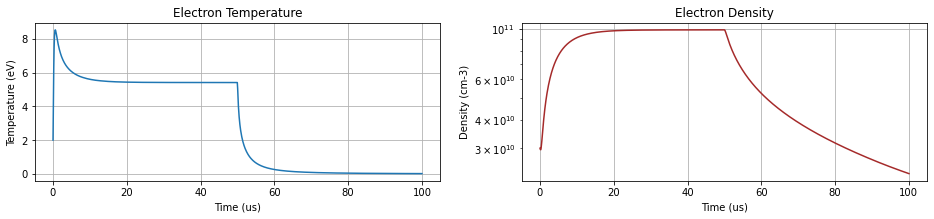

Condition : 5mTorr, 2000.0W, 0.1ms, 0.5


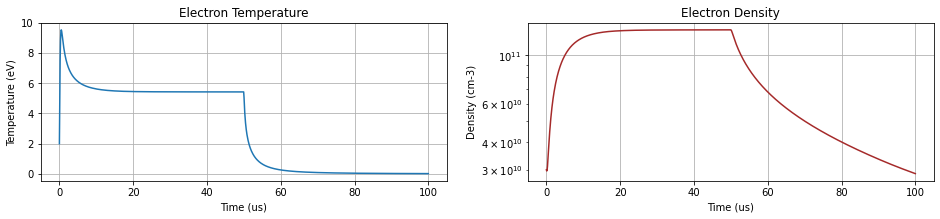

Condition : 5mTorr, 2500.0W, 0.1ms, 0.5


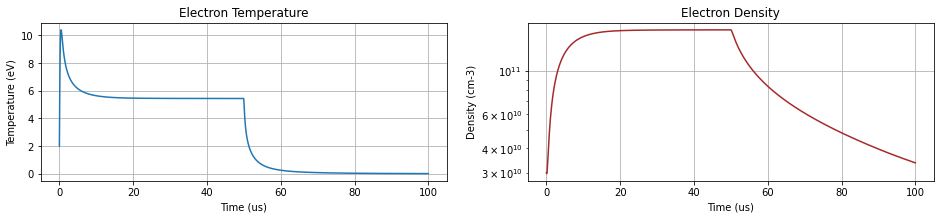

Condition : 5mTorr, 3000.0W, 0.1ms, 0.5


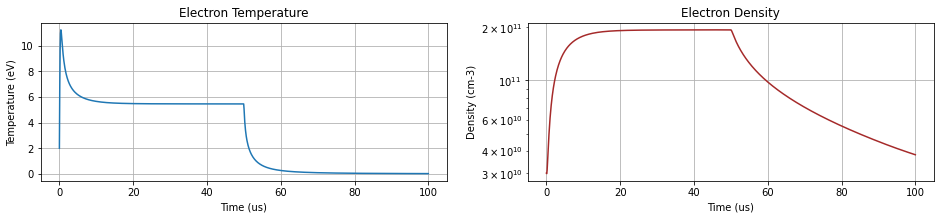

In [10]:
for i in range(1,7):
    input_power = 500*6.241509e18 #[eV/s] Input Power
    models = [0,0,0,0,0,0,0]
    models[i] = global_model(p, input_power*i, duty, period, time_resolution)
    models[i].calculation()
    models[i].visualization1(i)

In [ ]:
#### Calcultation & Data collection ####
variable = input('Please select variables you want to change\n')
DataCollecting(variable)

In [ ]:
def DataCollecting(variable):
    result = pd.Series([])
    frac_result = []
    if variable == 'p':
        i_list = p_list
        file_name = 'p variable ' + str(input_power/6.241509e18)+'W '+str(period*1000)+'ms ' + str(duty)
    elif variable == 'input_power':
        i_list = input_list
        file_name = 'input_power variable ' + str(p) + 'mTorr ' +str(period*1000)+'ms ' + str(duty)
    elif variable == 'duty':
        i_list = duty_list
        file_name = 'duty variable ' + str(p) + 'mTorr ' + str(input_power/6.241509e18)+'W '+str(period*1000)+'ms '
    elif variable == 'period':
        i_list = period_list
        file_name = 'period variable ' + str(p) + 'mTorr ' + str(input_power/6.241509e18)+'W ' + str(duty)
    else:
        print('Please put right variable name')
        return False
    
    for i in i_list:
        if variable == 'p':
            model = global_model(i, input_power, duty, period)
        if variable == 'input_power':
            model = global_model(p, i, duty, period)
        if variable == 'duty':
            model = global_model(p, input_power, i, period)
        if variable == 'period':
            model = global_model(p, input_power, duty, i)
        model.calculation()
        #model.visualization1()
        model.iteration()
        #model.visualization3()
        tmp = model.data_process()[0]
        frac_tmp = model.data_process()[2]
        frac_result += frac_tmp
        result = pd.concat([result,tmp],axis=1)
        print('ne: ',model.ne[-1])
        print('Te: ',model.T[-1])
        
    frac_result = np.array(frac_result).reshape(len(i_list),5)
    frac_result = pd.DataFrame(frac_result,columns=['H+','H2+','H3+','Te','ne'],index=i_list)
    result = result.drop(0, axis=1)
    if variable == 'input_power':
        result.columns = i_list/6.241509e18
        frac_result.index = i_list/6.241509e18
    else:
        result.columns = i_list
        frac_result.index = i_list
    #path = r'Model_result\\'
    result.to_csv(path+file_name + '.csv')
    frac_result.to_csv(path+'frac_'+file_name + '.csv')

    return result, frac_result